## Frequncy Domain

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [2]:
4096/48000

0.08533333333333333

In [3]:
datas, labels

(array([[-0.04109723, -0.046104  , -0.02837169, ...,  0.01460308,
          0.01189108,  0.01001354],
        [-0.00396369, -0.03150092, -0.05736923, ...,  0.05611754,
         -0.01460308, -0.09450277],
        [-0.14540492, -0.17419385, -0.17690585, ..., -0.024408  ,
         -0.09679754, -0.15437538],
        ...,
        [-0.07845867, -0.115184  , -0.16192533, ..., -0.21450933,
         -0.23454133, -0.227864  ],
        [-0.210336  , -0.15441333, -0.067608  , ...,  0.10600267,
          0.15942133,  0.20365867],
        [ 0.242888  ,  0.257912  ,  0.24121867, ...,  0.05675733,
          0.05174933,  0.04089867]]),
 array(['Ball_007', 'Ball_007', 'Ball_007', ..., 'OR_021', 'OR_021',
        'OR_021'], dtype='<U8'))

In [4]:
datas.shape

(1150, 4096)

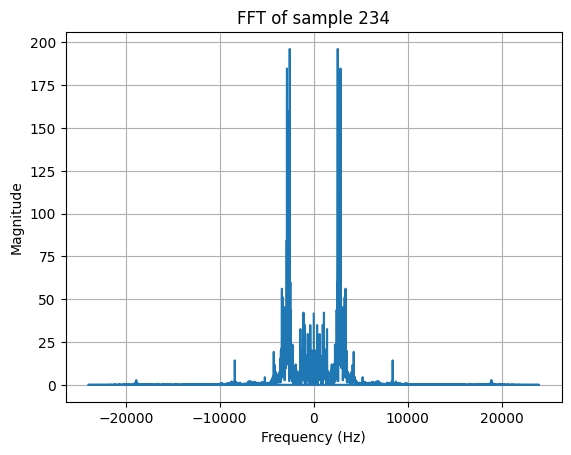

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 取第一筆資料
index = 234  # 你可以改成你要的 index
signal = datas[index]

# 計算 FFT
N = len(signal)  # 4096
freqs = np.fft.fftfreq(N, d=1/48000)  # 頻率刻度
fft_values = np.fft.fft(signal)

# 只取正頻率部分
half_N = N // 2
# plt.plot(freqs[:half_N], np.abs(fft_values[:half_N]))
plt.plot(freqs, np.abs(fft_values))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"FFT of sample {index}")
plt.grid()
plt.show()

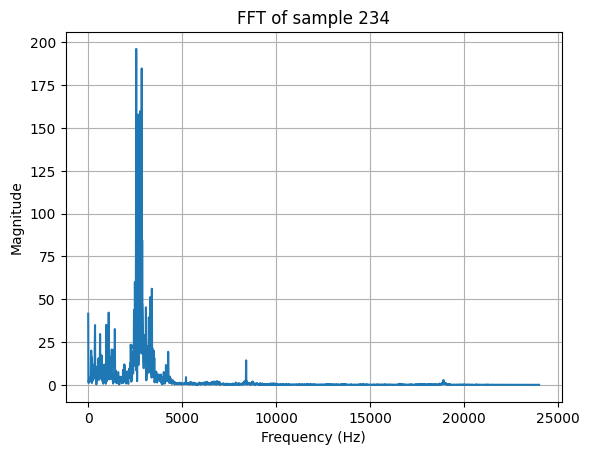

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 取第一筆資料
index = 234  # 你可以改成你要的 index
signal = datas[index]

# 計算 FFT
N = len(signal)  # 4096
freqs = np.fft.fftfreq(N, d=1/48000)  # 頻率刻度
fft_values = np.fft.fft(signal)

# 只取正頻率部分
half_N = N // 2
plt.plot(freqs[:half_N], np.abs(fft_values[:half_N]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"FFT of sample {index}")
plt.grid()
plt.show()

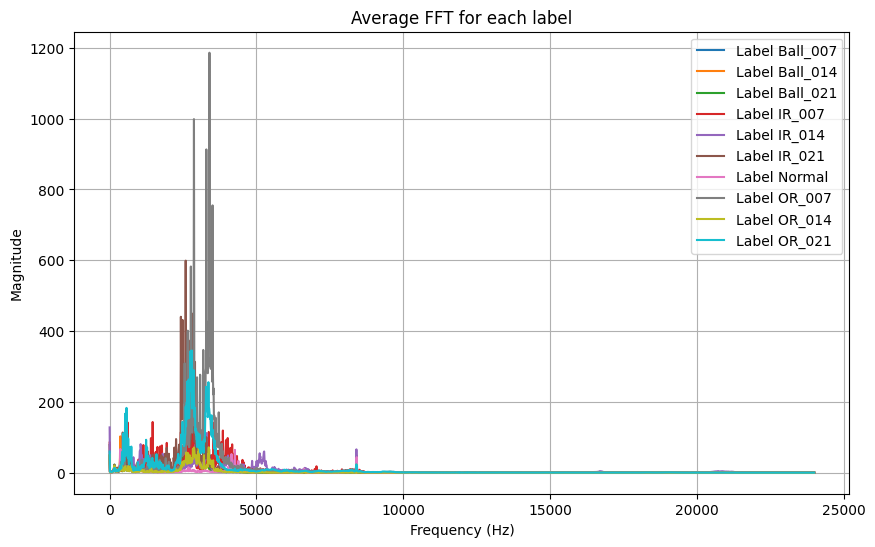

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 載入數據
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 計算 FFT
def compute_average_fft(datas, labels, sample_rate=48000):
    unique_labels = np.unique(labels)  # 獲取所有不同的 labels
    average_ffts = {}  # 儲存每個 label 的平均 FFT

    for label in unique_labels:
        # 根據 label 篩選出對應的資料
        label_indices = np.where(labels == label)[0]
        label_signals = datas[label_indices]

        # 計算每個類別的平均 FFT
        fft_values = np.fft.fft(label_signals, axis=1)  # 按行計算 FFT
        fft_magnitudes = np.abs(fft_values)  # 計算幅度
        average_fft = np.mean(fft_magnitudes, axis=0)  # 計算平均 FFT

        # 頻率刻度
        N = label_signals.shape[1]
        freqs = np.fft.fftfreq(N, d=1/sample_rate)

        # 只保留正頻率部分
        half_N = N // 2
        average_ffts[label] = (freqs[:half_N], average_fft[:half_N])  # 儲存正頻率部分

    return average_ffts

# 計算每個 labels 的平均 FFT
average_ffts = compute_average_fft(datas, labels)

# 畫出每個 label 的平均 FFT
plt.figure(figsize=(10, 6))
for label, (freqs, avg_fft) in average_ffts.items():
    plt.plot(freqs, avg_fft, label=f"Label {label}")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Average FFT for each label")
plt.legend()
plt.grid()
plt.show()

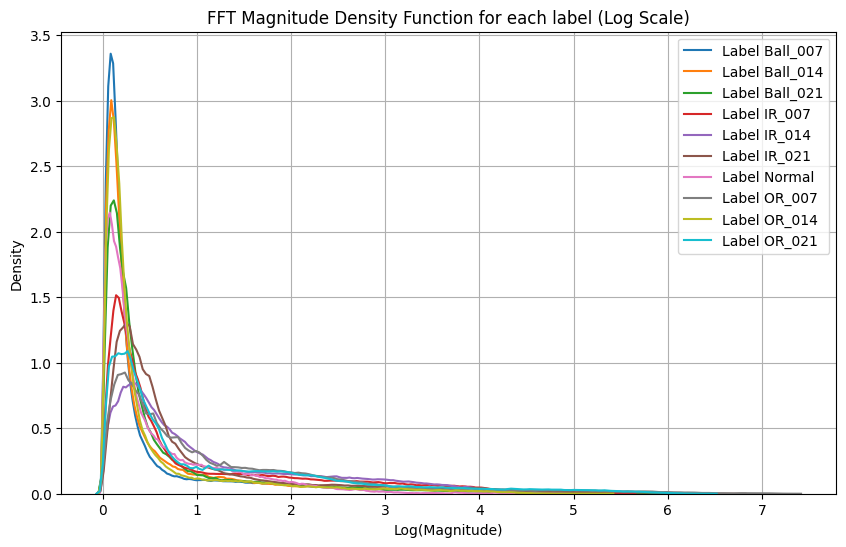

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 載入數據
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 計算 FFT
def compute_density_function(datas, labels, sample_rate=48000):
    unique_labels = np.unique(labels)  # 獲取所有不同的 labels
    density_functions = {}  # 儲存每個 label 的密度函數

    for label in unique_labels:
        # 根據 label 篩選出對應的資料
        label_indices = np.where(labels == label)[0]
        label_signals = datas[label_indices]

        # 計算每個類別的 FFT
        fft_values = np.fft.fft(label_signals, axis=1)  # 按行計算 FFT
        fft_magnitudes = np.abs(fft_values)  # 計算幅度

        # 頻率刻度
        N = label_signals.shape[1]
        freqs = np.fft.fftfreq(N, d=1/sample_rate)

        # 只保留正頻率部分
        half_N = N // 2
        positive_freqs = freqs[:half_N]
        positive_fft_magnitudes = fft_magnitudes[:, :half_N]

        # 將每個類別的 FFT 幅度集合到密度函數中
        density_functions[label] = positive_fft_magnitudes

    return density_functions

# 計算每個 labels 的 FFT 密度函數
density_functions = compute_density_function(datas, labels)

# 畫出每個 label 的 FFT 密度函數
plt.figure(figsize=(10, 6))
for label, fft_magnitudes in density_functions.items():
    # 使用對數縮放將幅度轉換成對數尺度
    log_fft_magnitudes = np.log1p(fft_magnitudes.flatten())  # 使用 log1p 避免 log(0)
    
    # 使用 seaborn 的 kdeplot 繪製密度函數，調整 bw_adjust 來平滑密度
    sns.kdeplot(log_fft_magnitudes, label=f"Label {label}", bw_adjust=0.2)  # 調整 bw_adjust 以平滑

plt.xlabel("Log(Magnitude)")
plt.ylabel("Density")
plt.title("FFT Magnitude Density Function for each label (Log Scale)")
plt.legend()
plt.grid(True)
plt.show()

## Frequency Feature Extraction

In [4]:
fft_magnitude.shape

(1150, 4096)

In [8]:
fft_magnitude

array([[82.11497908,  1.964394  ,  1.01085989, ...,  0.12592887,
         1.01085989,  1.964394  ],
       [84.84867508,  1.55021838,  0.77800192, ...,  0.89432628,
         0.77800192,  1.55021838],
       [88.65089908,  1.55879676,  1.04855971, ...,  1.02985959,
         1.04855971,  1.55879676],
       ...,
       [61.96064533,  2.03107158,  3.01837503, ...,  3.38667208,
         3.01837503,  2.03107158],
       [60.256256  ,  1.40903702,  0.75762583, ...,  1.99530546,
         0.75762583,  1.40903702],
       [54.24248267,  3.1488437 ,  2.71123561, ...,  1.05506403,
         2.71123561,  3.1488437 ]])

In [1]:
import numpy as np
import pandas as pd

# 載入數據
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 計算 FFT 轉換
fft_result = np.fft.fft(datas, axis=1)  # 按行進行 FFT 轉換
fft_magnitude = np.abs(fft_result)  # 計算 FFT 的幅度

# 頻率 bins 對應於 FFT
freq_bins = np.fft.fftfreq(datas.shape[1], d=1/48000)  # 48000 是假設的取樣率，根據你的實際取樣率調整

# 計算頻域特徵
def compute_frequency_features(fft_magnitude, freq_bins):
    # 總功率（能量）
    power_spectrum = fft_magnitude ** 2
    total_power = np.sum(power_spectrum, axis=1)

    # 均方根頻率（RMSF）
    rmsf = np.sqrt(np.sum((freq_bins**2) * power_spectrum, axis=1) / total_power)

    # 中心頻率（CF）
    cf = np.sum(freq_bins * power_spectrum, axis=1) / total_power

    # 頻率標準差（FSD）
    fsd = np.sqrt(np.sum((freq_bins - cf[:, None])**2 * power_spectrum, axis=1) / total_power)

    # 頻譜峭度（Spectral Kurtosis）
    spectral_kurtosis = np.sum(((freq_bins - cf[:, None])**4) * power_spectrum, axis=1) / (fsd**4 * total_power)

    # 頻譜熵（Spectral Entropy）
    power_norm = power_spectrum / np.sum(power_spectrum, axis=1, keepdims=True)
    spectral_entropy = -np.sum(power_norm * np.log2(power_norm + 1e-12), axis=1)

    # 組成 DataFrame
    df_features = pd.DataFrame({
        'RMSF': rmsf,
        'CF': cf,
        'FSD': fsd,
        'Spectral_Kurtosis': spectral_kurtosis,
        'Spectral_Entropy': spectral_entropy
    })
    return df_features

# 計算頻域特徵
freq_features = compute_frequency_features(fft_magnitude, freq_bins)

# 如果需要加上 labels
freq_features['fault'] = labels

# 顯示結果
print(freq_features.head())

          RMSF        CF          FSD  Spectral_Kurtosis  Spectral_Entropy  \
0  2918.480340 -0.000035  2918.480340           1.514515          7.369935   
1  2880.919719 -0.000320  2880.919719           1.442190          6.967358   
2  2924.302041 -0.000046  2924.302041           1.454622          7.247163   
3  2923.217585 -0.000812  2923.217585           1.531435          7.179330   
4  2871.558903 -0.000495  2871.558903           1.555270          7.219221   

      fault  
0  Ball_007  
1  Ball_007  
2  Ball_007  
3  Ball_007  
4  Ball_007  


In [3]:
import numpy as np
import pandas as pd

# 載入數據
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 計算 FFT 轉換
fft_result = np.fft.fft(datas, axis=1)  # 按行進行 FFT 轉換
fft_magnitude = np.abs(fft_result)  # 計算 FFT 的幅度

# 只保留正頻率部分
half_size = fft_result.shape[1] // 2  # 正頻率部分的大小
fft_magnitude = fft_magnitude[:, :half_size]  # 只取前半部

# 頻率 bins 對應於 FFT
freq_bins = np.fft.fftfreq(datas.shape[1], d=1/48000)  # 48000 是假設的取樣率，根據你的實際取樣率調整
freq_bins = freq_bins[:half_size]  # 只保留正頻率部分的頻率 bins

# 計算頻域特徵
def compute_frequency_features(fft_magnitude, freq_bins):
    # 總功率（能量）
    power_spectrum = fft_magnitude ** 2
    total_power = np.sum(power_spectrum, axis=1)

    # 均方根頻率（RMSF）
    rmsf = np.sqrt(np.sum((freq_bins**2) * power_spectrum, axis=1) / total_power)

    # 中心頻率（CF）
    cf = np.sum(freq_bins * power_spectrum, axis=1) / total_power

    # 頻率標準差（FSD）
    fsd = np.sqrt(np.sum((freq_bins - cf[:, None])**2 * power_spectrum, axis=1) / total_power)

    # 頻譜峭度（Spectral Kurtosis）
    spectral_kurtosis = np.sum(((freq_bins - cf[:, None])**4) * power_spectrum, axis=1) / (fsd**4 * total_power)

    # 頻譜熵（Spectral Entropy）
    power_norm = power_spectrum / np.sum(power_spectrum, axis=1, keepdims=True)
    spectral_entropy = -np.sum(power_norm * np.log2(power_norm + 1e-12), axis=1)

    # 組成 DataFrame
    df_features = pd.DataFrame({
        'RMSF': rmsf,
        'CF': cf,
        'FSD': fsd,
        'Spectral_Kurtosis': spectral_kurtosis,
        'Spectral_Entropy': spectral_entropy
    })
    return df_features

# 計算頻域特徵
freq_features = compute_frequency_features(fft_magnitude, freq_bins)

# 如果需要加上 labels
freq_features['fault'] = labels

# 顯示結果
print(freq_features.head())

          RMSF           CF          FSD  Spectral_Kurtosis  Spectral_Entropy  \
0  2884.000787  2701.018941  1010.918999          12.625324          6.357429   
1  2855.451870  2716.449532   880.060974          19.284358          5.972475   
2  2890.031448  2719.633698   977.688254          12.963190          6.237891   
3  2892.948334  2736.425818   938.681950          19.949226          6.176231   
4  2845.808381  2688.952182   931.751846          19.294174          6.219546   

      fault  
0  Ball_007  
1  Ball_007  
2  Ball_007  
3  Ball_007  
4  Ball_007  


In [4]:
freq_features.shape

(1150, 6)

In [5]:
freq_features.to_pickle("datas/48k_DE_load1_segment4096_overlap0_FDFeature.pkl")

In [6]:
import pandas as pd
df = pd.read_pickle("datas/48k_DE_load1_segment4096_overlap0_FDFeature.pkl")

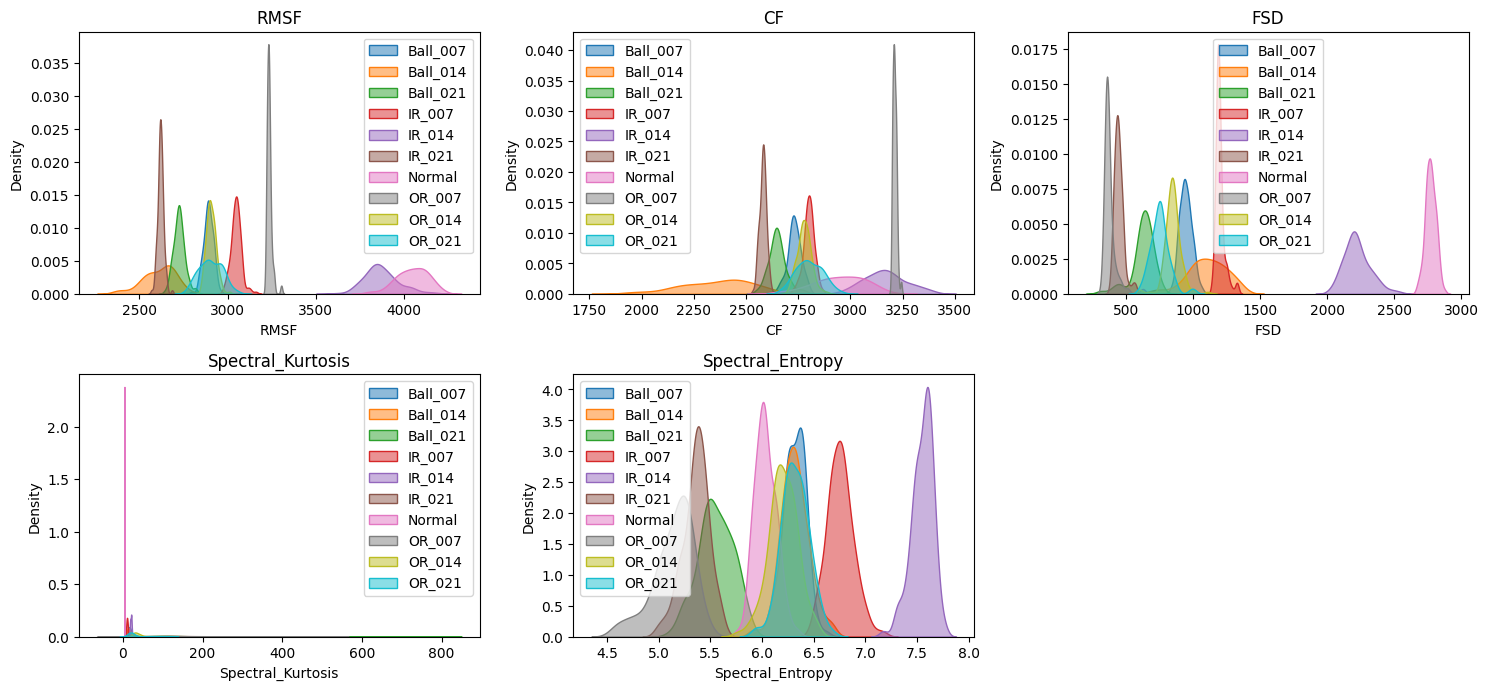

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [8]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(df.iloc[:, :-1])

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")